In [1]:
import numpy as np

### Load Features, Names, and Labels

In [2]:
train_features_path =  "../feature/ICDAR-feature/train_features_triplet_loss_224.npy"
train_names_path = "../feature/ICDAR-feature/train_names.npy"
train_labels_path = "../feature/ICDAR-feature/train_labels.npy"

test_features_path = "../feature/ICDAR-feature/test_features_triplet_loss_224.npy"
test_names_path = "../feature/ICDAR-feature/test_names.npy"
test_labels_path = "../feature/ICDAR-feature/test_labels.npy"

validation_features_path = "../feature/ICDAR-feature/validation_features_triplet_loss_224.npy"
validation_names_path = "../feature/ICDAR-feature/validation_names.npy"
validation_labels_path = "../feature/ICDAR-feature/validation_labels.npy"

In [3]:
train_features = np.load(train_features_path)
train_names = np.load(train_names_path)
train_labels = np.load(train_labels_path)

test_features = np.load(test_features_path)
test_names = np.load(test_names_path)
test_labels = np.load(test_labels_path)

validation_features = np.load(validation_features_path)
validation_names = np.load(validation_names_path)
validation_labels = np.load(validation_labels_path)

In [4]:
print("train_features shape : ", train_features.shape)
print("test_features shape : ", test_features.shape)
print("validation_features shape : ", validation_features.shape)

train_features shape :  (857, 512)
test_features shape :  (401, 512)
validation_features shape :  (391, 512)


In [5]:
# Feature Gallery dilakukan untuk setiap kelas / nama seperti "001", "002", "003", dst dengan cara mengambil data training positive dan mengambil mean / rata-rata dari data tersebut
def create_feature_gallery(train_features, train_names, train_labels):
    gallery_feature = []
    gallery_name = []

    unique_names = set(train_names.flatten())
    sorted_names = sorted(unique_names)

    for name in sorted_names:
        # print(name)
        # print(name)
        name_features = []

        for feature, feature_name, label in zip(train_features, train_names, train_labels):
            # print(feature, feature_name, label)
            if name in feature_name and label == 1:
                name_features.append(feature)

        if name_features:
            # print(name_features)
            average_feature = np.mean(name_features, axis=0)
            gallery_feature.append(average_feature)
            gallery_name.append(name)

    return gallery_feature, gallery_name

In [6]:
gallery_features, gallery_names = create_feature_gallery(train_features, train_names, train_labels)

In [7]:
gallery_feature_path = "../feature/ICDAR-feature/gallery_features_triplet_loss_224.npy"
gallery_name_path = "../feature/ICDAR-feature/gallery_names_224.npy"

In [8]:
np.save(gallery_feature_path, gallery_features)
np.save(gallery_name_path, gallery_names)

In [9]:
gallery_features = np.load(gallery_feature_path)
gallery_names = np.load(gallery_name_path)

In [10]:
gallery_features_array = np.array(gallery_features)
print("gallery features shape : ", gallery_features_array.shape)

gallery features shape :  (64, 512)


### Euclidean Distance

In [11]:
def euclidean_distance(feature_vector1, feature_vector2):
    return np.sqrt(np.sum((feature_vector1 - feature_vector2)**2))

In [12]:
def find_euclidean_distance(test_features, test_names, test_labels, gallery_features, gallery_names):
    euclidean_distances = []
    euclidean_names = []
    euclidean_actual_labels = []

    for gallery_feature, gallery_name in zip(gallery_features, gallery_names):
        curr_euclid_name = gallery_name
        curr_euclid_feature = []
        curr_euclid_label = []
        curr_euclid_dist = []
        for feature, name, label in zip(test_features, test_names, test_labels):
            if gallery_name in name:
                curr_euclid_feature.append(feature)
                curr_euclid_label.append(label)
        
        for feature in curr_euclid_feature:
            distance = euclidean_distance(feature, gallery_feature)
            curr_euclid_dist.append(distance)

        euclidean_distances.append(curr_euclid_dist)
        euclidean_names.append(curr_euclid_name)
        euclidean_actual_labels.append(curr_euclid_label)
        
    return euclidean_distances, euclidean_names, euclidean_actual_labels

In [13]:
test_euclidean_distances, test_euclidean_names, test_euclidean_actual_labels = find_euclidean_distance(test_features, test_names, test_labels, gallery_features, gallery_names)
train_euclidean_distances, train_euclidean_names, train_euclidean_actual_labels = find_euclidean_distance(train_features, train_names, train_labels, gallery_features, gallery_names)
validation_euclidean_distances, validation_euclidean_names, validation_euclidean_actual_labels = find_euclidean_distance(validation_features, validation_names, validation_labels, gallery_features, gallery_names)

### Split Euclidean Distance to Positive and Negative for Future Use (If needed)

In [14]:
def split_euc_dist(euclidean_distances, euclidean_names, euclidean_actual_labels):
    positive_distance = []
    positive_name = []
    positive_label = []
    negative_distance = []
    negative_name = []
    negative_label = []

    for euclidean_distance, euclidean_name, euclidean_actual_label in zip(euclidean_distances, euclidean_names, euclidean_actual_labels):
        pos_dist = []
        neg_dist = []
        pos_lab = []
        neg_lab = []
        for distance, label in zip(euclidean_distance, euclidean_actual_label):
            if label == 0:
                neg_dist.append(distance)
                neg_lab.append(label)
            else:
                pos_dist.append(distance)
                pos_lab.append(label)

        positive_distance.append(pos_dist)
        positive_name.append(euclidean_name)
        positive_label.append(pos_lab)

        negative_distance.append(neg_dist)
        negative_name.append(euclidean_name)
        negative_label.append(neg_lab)
        # print(euclidean_distance, euclidean_name, euclidean_actual_label)

    return positive_distance, negative_label

In [15]:
train_positive_dist, train_negative_dist = split_euc_dist(train_euclidean_distances, train_names, train_euclidean_actual_labels)
test_positive_dist, test_negative_dist = split_euc_dist(test_euclidean_distances, test_names, test_euclidean_actual_labels)
validation_positive_dist, validation_negative_dist = split_euc_dist(validation_euclidean_distances, validation_names, validation_euclidean_actual_labels)

In [16]:
flat_train_positive_dist = [item for sublist in train_positive_dist for item in sublist]
flat_train_negative_dist = [item for sublist in train_negative_dist for item in sublist]
flat_test_positive_dist = [item for sublist in test_positive_dist for item in sublist]
flat_test_negative_dist = [item for sublist in test_negative_dist for item in sublist]
flat_validation_positive_dist = [item for sublist in validation_positive_dist for item in sublist]
flat_validation_negative_dist = [item for sublist in validation_negative_dist for item in sublist]

print(f'Train total : {len(flat_train_positive_dist) + len(flat_train_negative_dist)}')
print(f'  Train pos : {len(flat_train_positive_dist)}')
print(f'  Train neg : {len(flat_train_negative_dist)}')
print(f' Test total : {len(flat_test_positive_dist) + len(flat_test_negative_dist)}')
print(f'   Test pos : {len(flat_test_positive_dist)}')
print(f'   Test neg : {len(flat_test_negative_dist)}')
print(f'  Val total : {len(flat_validation_positive_dist) + len(flat_validation_negative_dist)}')
print(f'    Val pos : {len(flat_validation_positive_dist)}')
print(f'    Val neg : {len(flat_validation_negative_dist)}')

Train total : 857
  Train pos : 463
  Train neg : 394
 Test total : 401
   Test pos : 212
   Test neg : 189
  Val total : 391
    Val pos : 212
    Val neg : 179


### Normalize Euclidean Distance

In [17]:
# Flatten the lists of distances
flat_test_distances = [item for sublist in test_euclidean_distances for item in sublist]
flat_train_distances = [item for sublist in train_euclidean_distances for item in sublist]
flat_validation_distances = [item for sublist in validation_euclidean_distances for item in sublist]

In [18]:
print(flat_train_distances)

[16.513756, 20.551702, 20.29446, 16.665415, 16.853619, 18.183836, 17.520678, 12.034149, 17.471807, 15.688517, 13.213245, 14.857463, 14.51674, 21.279331, 33.967415, 33.669327, 23.823832, 27.570332, 20.390844, 38.308533, 15.64258, 18.479504, 21.911186, 17.840628, 13.9030905, 13.932134, 20.383297, 28.824028, 19.313591, 16.645456, 18.327053, 12.419936, 23.266098, 15.8058605, 14.014572, 18.888897, 22.279509, 14.063885, 19.530354, 23.490263, 18.016151, 23.205948, 18.265636, 20.918371, 20.803606, 18.180832, 21.391333, 14.728558, 18.422422, 18.829597, 19.47831, 17.60404, 25.965887, 39.454575, 37.00346, 48.290634, 55.987312, 32.491287, 10.845079, 13.0575905, 12.290046, 12.226165, 13.44693, 11.048726, 13.713381, 15.372105, 11.424273, 14.195817, 13.60592, 15.47585, 12.610479, 20.986244, 59.91212, 63.368866, 50.34322, 53.678226, 52.336212, 55.971935, 41.082417, 36.27382, 29.232744, 30.285166, 31.028034, 33.18085, 30.949287, 33.374935, 35.780895, 34.15934, 34.751476, 38.005104, 35.300663, 33.410572

In [19]:
for name, distance, label in zip(test_names, flat_test_distances, test_labels):
    print(name, distance, label)

001 29.779457 1
001 27.186823 1
001 14.327489 1
001 20.588934 1
001 13.768797 1
001 17.90596 0
001 18.62818 0
002 38.25329 1
002 32.483303 1
002 38.106354 1
002 31.31597 1
002 36.050713 1
002 34.565357 0
002 31.321949 0
002 24.70035 0
003 45.512463 1
003 45.706905 1
003 44.300068 1
003 41.46234 1
003 39.513676 1
003 37.061237 0
003 48.642242 0
003 44.17923 0
004 51.16851 1
004 63.317493 1
004 58.82541 1
004 47.866657 1
004 52.1243 1
004 31.387798 0
004 38.449764 0
004 38.426865 0
006 39.869328 1
006 33.952827 1
006 47.079445 1
006 47.391117 1
006 49.261654 1
006 36.878643 0
006 30.776299 0
006 36.984024 0
009 43.0817 1
009 40.52256 1
009 37.639706 1
009 27.846958 1
009 45.340134 1
009 29.142183 0
009 31.555946 0
009 33.084064 0
012 30.338243 1
012 41.009293 1
012 30.91715 1
012 37.858204 1
012 41.079105 1
012 41.17667 0
012 44.0032 0
012 48.485336 0
013 40.147423 1
013 42.462444 1
013 58.927753 1
013 45.58102 0
013 49.953465 0
013 51.059147 0
014 32.24483 1
014 35.2135 1
014 33.10414 1

In [20]:
def get_min_max(euclidean_distances):
    min_distance = min(euclidean_distances)
    max_distance = max(euclidean_distances)

    return min_distance, max_distance

In [21]:
min_val, max_val = get_min_max(flat_train_distances)
print(f'min: {min_val}, max: {max_val}')
min_val, max_val = get_min_max(flat_validation_distances)
print(f'min: {min_val}, max: {max_val}')
min_val, max_val = get_min_max(flat_test_distances)
print(f'min: {min_val}, max: {max_val}')

min: 8.551058769226074, max: 78.29893493652344
min: 13.47707748413086, max: 78.51383972167969
min: 11.980369567871094, max: 73.77912902832031


In [22]:
def normalize_distance(euclidean_distances, min_val, max_val):
    all_distance = []

    for distance in euclidean_distances:
        normalized_distance = (distance - min_val) / (max_val - min_val)

        # in case test and train distances are beyond max of train
        if normalized_distance > 1:
            normalized_distance = 1
        elif normalized_distance < 0:
            normalized_distance = 0
        
        all_distance.append(normalized_distance)

    return all_distance

def reverse_normalized_distance(euclidean_distances, min_val, max_val):
    reverse_distance = []
    normalized_distances = normalize_distance(euclidean_distances, min_val, max_val)
    for distance in normalized_distances:
        distance = -distance
        reverse_distance.append(distance)

    return reverse_distance

In [23]:
# normalized_positive_distances = reverse_normalized_distance(positive_distance)
# normalized_negative_distances = reverse_normalized_distance(negative_distance)

In [24]:
normalized_test_euclidean_distance = reverse_normalized_distance(flat_test_distances, min_val, max_val)
normalized_train_euclidean_distance = reverse_normalized_distance(flat_train_distances, min_val, max_val)
normalized_validation_euclidean_distance = reverse_normalized_distance(flat_validation_distances, min_val, max_val)

In [25]:
print(normalized_test_euclidean_distance)

[-0.28801692, -0.24606405, -0.03798004, -0.13929996, -0.028939534, -0.09588527, -0.1075719, -0.42513666, -0.33176935, -0.42275903, -0.31288007, -0.38949558, -0.36546022, -0.31297684, -0.20582905, -0.5426014, -0.54574776, -0.52298295, -0.47706413, -0.4455317, -0.40584743, -0.5932461, -0.5210276, -0.63412505, -0.83071446, -0.7580256, -0.5806959, -0.64959115, -0.31404236, -0.42831597, -0.4279454, -0.4512867, -0.35554853, -0.5679576, -0.57300097, -0.60326916, -0.40289277, -0.30414736, -0.404598, -0.5032679, -0.46185702, -0.41520795, -0.25674608, -0.53981286, -0.27770483, -0.31676325, -0.3414906, -0.29705894, -0.4697331, -0.30642655, -0.41874358, -0.47086278, -0.47244152, -0.5181792, -0.5907071, -0.4557867, -0.49324736, -0.75968164, -0.54371077, -0.6144637, -0.6323554, -0.32791048, -0.3759482, -0.34181547, -0.4744122, -0.39106587, -0.34429148, -0.3778757, -0.33817944, -0.43157023, -0.67303, -0.7253221, -0.9897864, -0.86491257, -0.9458233, -0.83553684, -0.67939395, -0.71094483, -0.24579906, 

In [26]:
for name, distance, label in zip(test_names, normalized_test_euclidean_distance, test_labels):
    print(name, distance, label)

001 -0.28801692 1
001 -0.24606405 1
001 -0.03798004 1
001 -0.13929996 1
001 -0.028939534 1
001 -0.09588527 0
001 -0.1075719 0
002 -0.42513666 1
002 -0.33176935 1
002 -0.42275903 1
002 -0.31288007 1
002 -0.38949558 1
002 -0.36546022 0
002 -0.31297684 0
002 -0.20582905 0
003 -0.5426014 1
003 -0.54574776 1
003 -0.52298295 1
003 -0.47706413 1
003 -0.4455317 1
003 -0.40584743 0
003 -0.5932461 0
003 -0.5210276 0
004 -0.63412505 1
004 -0.83071446 1
004 -0.7580256 1
004 -0.5806959 1
004 -0.64959115 1
004 -0.31404236 0
004 -0.42831597 0
004 -0.4279454 0
006 -0.4512867 1
006 -0.35554853 1
006 -0.5679576 1
006 -0.57300097 1
006 -0.60326916 1
006 -0.40289277 0
006 -0.30414736 0
006 -0.404598 0
009 -0.5032679 1
009 -0.46185702 1
009 -0.41520795 1
009 -0.25674608 1
009 -0.53981286 1
009 -0.27770483 0
009 -0.31676325 0
009 -0.3414906 0
012 -0.29705894 1
012 -0.4697331 1
012 -0.30642655 1
012 -0.41874358 1
012 -0.47086278 1
012 -0.47244152 0
012 -0.5181792 0
012 -0.5907071 0
013 -0.4557867 1
013 -0.49

# 3. ROC Curve

In [27]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator

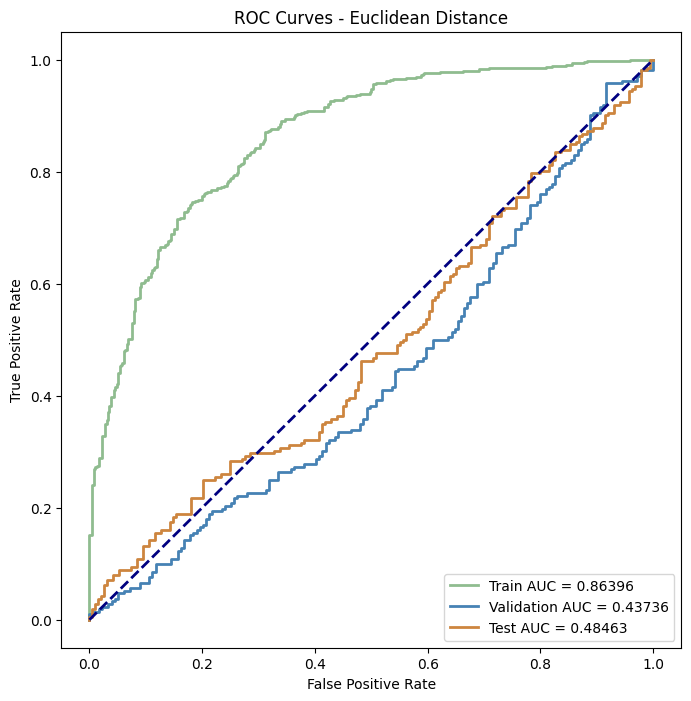

In [28]:
# Flatten the lists of labels
flat_test_labels = [item for sublist in test_euclidean_actual_labels for item in sublist]
flat_train_labels = [item for sublist in train_euclidean_actual_labels for item in sublist]
flat_validation_labels = [item for sublist in validation_euclidean_actual_labels for item in sublist]

# Calculate ROC curve
fpr_test, tpr_test, thresholds_test = roc_curve(flat_test_labels, normalized_test_euclidean_distance, drop_intermediate=False)
roc_auc_test = auc(fpr_test, tpr_test)
fpr_train, tpr_train, thresholds_train = roc_curve(flat_train_labels, normalized_train_euclidean_distance, drop_intermediate=False)
roc_auc_train = auc(fpr_train, tpr_train)
fpr_validation, tpr_validation, thresholds_validation = roc_curve(flat_validation_labels, normalized_validation_euclidean_distance, drop_intermediate=False)
roc_auc_validation = auc(fpr_validation, tpr_validation)

# Plot ROC curve
plt.figure(figsize=(8, 8))

plt.plot(fpr_train, tpr_train, color='darkseagreen', lw=2, label=f'Train AUC = {roc_auc_train:.5f}')
plt.plot(fpr_validation, tpr_validation, color='steelblue', lw=2, label=f'Validation AUC = {roc_auc_validation:.5f}')
plt.plot(fpr_test, tpr_test, color='peru', lw=2, label=f'Test AUC = {roc_auc_test:.5f}')

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves - Euclidean Distance')
plt.legend(loc='lower right')
plt.show()

In [29]:
print(tpr_test)

[0.         0.00471698 0.00471698 0.00943396 0.01415094 0.01886792
 0.01886792 0.02358491 0.02830189 0.02830189 0.03301887 0.03773585
 0.03773585 0.04245283 0.04245283 0.04716981 0.05188679 0.05660377
 0.06132075 0.06132075 0.06603774 0.07075472 0.07075472 0.07075472
 0.0754717  0.08018868 0.08018868 0.08018868 0.08490566 0.08962264
 0.08962264 0.08962264 0.08962264 0.08962264 0.09433962 0.09433962
 0.09433962 0.0990566  0.10377358 0.10849057 0.10849057 0.10849057
 0.11320755 0.11792453 0.12264151 0.12735849 0.13207547 0.13207547
 0.13207547 0.13679245 0.14150943 0.14150943 0.14150943 0.14622642
 0.1509434  0.15566038 0.15566038 0.15566038 0.16037736 0.16037736
 0.16037736 0.16037736 0.16509434 0.16981132 0.1745283  0.1745283
 0.17924528 0.18396226 0.18396226 0.18867925 0.18867925 0.18867925
 0.18867925 0.18867925 0.18867925 0.19339623 0.19811321 0.20283019
 0.20754717 0.21226415 0.21698113 0.21698113 0.21698113 0.21698113
 0.21698113 0.22169811 0.22641509 0.23113208 0.23584906 0.24056

In [30]:
print(fpr_test)

[0.         0.         0.00529101 0.00529101 0.00529101 0.00529101
 0.01058201 0.01058201 0.01058201 0.01587302 0.01587302 0.01587302
 0.02116402 0.02116402 0.02645503 0.02645503 0.02645503 0.02645503
 0.02645503 0.03174603 0.03174603 0.03174603 0.03703704 0.04232804
 0.04232804 0.04232804 0.04761905 0.05291005 0.05291005 0.05291005
 0.05820106 0.06349206 0.06878307 0.07407407 0.07407407 0.07936508
 0.08465608 0.08465608 0.08465608 0.08465608 0.08994709 0.0952381
 0.0952381  0.0952381  0.0952381  0.0952381  0.0952381  0.1005291
 0.10582011 0.10582011 0.10582011 0.11111111 0.11640212 0.11640212
 0.11640212 0.11640212 0.12169312 0.12698413 0.12698413 0.13227513
 0.13756614 0.14285714 0.14285714 0.14285714 0.14285714 0.14814815
 0.14814815 0.14814815 0.15343915 0.15343915 0.15873016 0.16402116
 0.16931217 0.17460317 0.17989418 0.17989418 0.17989418 0.17989418
 0.17989418 0.17989418 0.17989418 0.18518519 0.19047619 0.1957672
 0.2010582  0.2010582  0.2010582  0.2010582  0.2010582  0.2010582

In [31]:
def find_tpr_at_fpr(fpr, tpr, target_fpr):
    return np.interp(target_fpr, fpr, tpr)

In [32]:
target_fprs = [0.1, 0.01, 0.001]
tpr_at_target_fpr_train = [find_tpr_at_fpr(fpr_train, tpr_train, fpr) for fpr in target_fprs]
tpr_at_target_fpr_test = [find_tpr_at_fpr(fpr_test, tpr_test, fpr) for fpr in target_fprs]
tpr_at_target_fpr_val = [find_tpr_at_fpr(fpr_validation, tpr_validation, fpr) for fpr in target_fprs]

In [33]:
print("Train")
for tpr, fpr in zip(tpr_at_target_fpr_train, target_fprs):
    print(f'TPR at FPR {fpr:.3f}: {tpr:.3f}')
print(f'             AUC: {roc_auc_train}')

print("Validation")
for tpr, fpr in zip(tpr_at_target_fpr_val, target_fprs):
    print(f'TPR at FPR {fpr:.3f}: {tpr:.3f}')
print(f'             AUC: {roc_auc_validation}')

print("Test")
for tpr, fpr in zip(tpr_at_target_fpr_test, target_fprs):
    print(f'TPR at FPR {fpr:.3f}: {tpr:.3f}')
print(f'             AUC: {roc_auc_test}')


Train
TPR at FPR 0.100: 0.607
TPR at FPR 0.010: 0.270
TPR at FPR 0.001: 0.151
             AUC: 0.8639582945039523
Validation
TPR at FPR 0.100: 0.066
TPR at FPR 0.010: 0.014
TPR at FPR 0.001: 0.009
             AUC: 0.43736165278802575
Test
TPR at FPR 0.100: 0.132
TPR at FPR 0.010: 0.019
TPR at FPR 0.001: 0.005
             AUC: 0.4846261355695318
